In [43]:
%matplotlib inline

import datetime
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import numpy as np
import pandas as pd
import s3fs
import fsspec
import dask
from dask.distributed import performance_report, Client, progress

from eofs.xarray import Eof
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Problem 1

### Create SST Dataset

In [1]:
import pandas as pd

base_url = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/'
base_url2 = '/e5.moda.an.sfc.128_034_sstk.ll025sc.'
base_url3 = '.nc'

# period of interest
pr = pd.date_range(start='1979-01',end='2021-12', freq='YS')

file_list=[]
for dt in pr:
    # get recent year and month
    year = dt.strftime('%Y')
    month = dt.strftime('%Y%m%d%H')
    month2 = (dt + pd.DateOffset(months=11)).strftime('%Y%m%d%H')

    # build complete file name
    single_file=(base_url+year+base_url2+month+'_'+month2+base_url3)
    file_list.append(single_file)



In [2]:
import numpy as np
import xarray as xr
ds = xr.Dataset()

for i in np.arange(len(file_list)):
    print(file_list[i])
    if i == 0:
        ds_SST = xr.open_dataset(file_list[i]).\
            sel(longitude=slice(120.,360.-60.,4), latitude=slice(65.,-65.,4))
    else:
        ds_i = xr.open_dataset(file_list[i]).\
            sel(longitude=slice(120.,360.-60.,4), latitude=slice(65.,-65.,4))
        ds_SST = xr.concat([ds_SST,ds_i], dim='time')

https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1979/e5.moda.an.sfc.128_034_sstk.ll025sc.1979010100_1979120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1980/e5.moda.an.sfc.128_034_sstk.ll025sc.1980010100_1980120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1981/e5.moda.an.sfc.128_034_sstk.ll025sc.1981010100_1981120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1982/e5.moda.an.sfc.128_034_sstk.ll025sc.1982010100_1982120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1983/e5.moda.an.sfc.128_034_sstk.ll025sc.1983010100_1983120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1984/e5.moda.an.sfc.128_034_sstk.ll025sc.1984010100_1984120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/1985/e5.moda.an.sfc.128_034_sstk.ll025sc.1985010100_1985120100.nc

In [3]:
# Create dataset grouped by month
gb_SST = ds_SST.SSTK.groupby('time.month')

In [4]:
# Calculate SST anomlies by subtracting the monthly mean from each month
anom_SST = gb_SST - gb_SST.mean('time')

In [18]:
anom_SST

<xarray.DataArray 'SSTK' (time: 516, latitude: 131, longitude: 181)>
array([[[            nan,             nan,             nan, ...,
          1.22070312e-04, -1.89208984e-03, -1.83410645e-02],
        [            nan,             nan,             nan, ...,
         -2.19726562e-03, -1.24816895e-02,  1.79901123e-01],
        [            nan,             nan,             nan, ...,
          2.07519531e-03,  2.96691895e-01,  7.50946045e-01],
        ...,
        [-2.04162598e-01, -2.56103516e-01, -3.79608154e-01, ...,
         -4.13787842e-01, -2.21466064e-01, -1.60980225e-01],
        [-4.99084473e-01, -5.28289795e-01, -6.21948242e-01, ...,
         -5.86273193e-01, -2.58026123e-01,             nan],
        [-8.32458496e-01, -8.09448242e-01, -8.03375244e-01, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
          1.22070312e-04,  1.22070312e-04, -8.85009766e-04],
        [            nan,             nan,             nan, ...,
         -1.22070312e-04, -1.28173828e-03,  1.13464355e-01],
        [            nan,             nan,             nan, ...,
         -9.15527344e-04,  3.18206787e-01,  8.25256348e-01],
...
          7.43682861e-01,  7.44262695e-01,  4.99237061e-01],
        [-9.84191895e-02, -1.27838135e-01, -1.15234375e-01, ...,
          7.59490967e-01,  6.67419434e-01,             nan],
        [-8.54492188e-04, -1.40380859e-03, -2.25830078e-03, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
          6.36596680e-02,  9.60388184e-02,  3.24096680e-02],
        [            nan,             nan,             nan, ...,
          7.87353516e-02,  6.57958984e-02,  2.56408691e-01],
        [            nan,             nan,             nan, ...,
          8.43811035e-02,  3.75854492e-01,  8.44512939e-01],
        ...,
        [ 1.24084473e-01,  1.33850098e-01,  8.41369629e-02, ...,
          3.13354492e-01,  2.55523682e-01, -8.07800293e-02],
        [ 1.92871094e-02,  3.27758789e-02,  1.32019043e-01, ...,
          5.53710938e-01,  3.13262939e-01,             nan],
        [-1.43981934e-01, -1.36169434e-01, -1.36566162e-01, ...,
                     nan,             nan,             nan]]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float64 65.0 64.0 63.0 62.0 ... -63.0 -64.0 -65.0
  * longitude  (longitude) float64 120.0 121.0 122.0 123.0 ... 298.0 299.0 300.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

### Create Precip Dataset

In [5]:
base_url = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.accumu/'
base_url2 = '/e5.moda.fc.sfc.accumu.128_228_tp.ll025sc.'
base_url3 = '.nc'

# period of interest
pr = pd.date_range(start='1979-01',end='2021-12', freq='YS')

file_list=[]
for dt in pr:
    # get recent year and month
    year = dt.strftime('%Y')
    month = dt.strftime('%Y%m%d%H')
    month2 = (dt + pd.DateOffset(months=11)).strftime('%Y%m%d%H')

    # build complete file name
    single_file=(base_url+year+base_url2+month+'_'+month2+base_url3)
    file_list.append(single_file)



In [27]:
import numpy as np
import xarray as xr
ds = xr.Dataset()

for i in np.arange(len(file_list)):
    print(file_list[i])
    if i == 0:
        ds_precip = xr.open_dataset(file_list[i]).\
            sel(longitude=slice(120.,360.-60.,4), latitude=slice(65.,-65.,4))
    else:
        ds_i = xr.open_dataset(file_list[i]).\
            sel(longitude=slice(120.,360.-60.,4), latitude=slice(65.,-65.,4))
        ds_precip = xr.concat([ds_precip,ds_i], dim='time')

https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.accumu/1979/e5.moda.fc.sfc.accumu.128_228_tp.ll025sc.1979010100_1979120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.accumu/1980/e5.moda.fc.sfc.accumu.128_228_tp.ll025sc.1980010100_1980120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.accumu/1981/e5.moda.fc.sfc.accumu.128_228_tp.ll025sc.1981010100_1981120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.accumu/1982/e5.moda.fc.sfc.accumu.128_228_tp.ll025sc.1982010100_1982120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.accumu/1983/e5.moda.fc.sfc.accumu.128_228_tp.ll025sc.1983010100_1983120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.accumu/1984/e5.moda.fc.sfc.accumu.128_228_tp.ll025sc.1984010100_1984120100.nc
https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.

In [28]:
# Create dataset grouped by month
gb_precip = ds_precip.TP.groupby('time.month')

In [29]:
# Calculate precip anomlies by subtracting the monthly mean from each month
anom_precip = gb_precip - gb_precip.mean(dim='time')

#### Plot Example

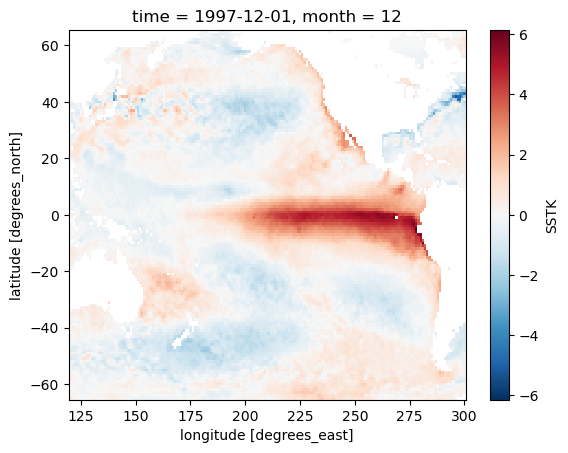

In [30]:
# Plot one month of SST anomalies
anom_SST.sel(time='1997-12-01', method='nearest').plot()

In [31]:
anom_precip

<xarray.DataArray 'TP' (time: 516, latitude: 131, longitude: 181)>
array([[[-1.51057582e-04, -1.13132381e-04, -5.52465790e-05, ...,
          1.57374004e-03,  1.51997944e-03,  1.29327108e-03],
        [-1.87829486e-04, -2.09009915e-04, -2.27706390e-04, ...,
          8.30783392e-04,  9.00135492e-04,  1.04010385e-03],
        [-2.42942973e-04, -2.67871597e-04, -2.73793237e-04, ...,
          5.69033087e-04,  8.83346424e-04,  9.97210620e-04],
        ...,
        [-1.03243010e-03, -1.09734642e-03, -1.02127425e-03, ...,
         -5.85866626e-04, -5.75974816e-04, -6.21950952e-04],
        [-9.93817346e-04, -9.72282025e-04, -9.35487915e-04, ...,
         -9.97099560e-04, -7.54711218e-04, -1.03586772e-03],
        [-7.27564795e-04, -7.22197583e-04, -7.81879877e-04, ...,
         -1.13380793e-03, -1.65866152e-03, -8.98205908e-04]],

       [[ 1.33957976e-04,  1.41609547e-04,  1.46732782e-04, ...,
          2.28269724e-03,  1.92351674e-03,  2.17311317e-03],
        [ 7.98868714e-05,  1.06035266e-04,  5.28956589e-05, ...,
          2.80384673e-03,  3.03002307e-03,  3.85876605e-03],
        [ 1.60572235e-05, -3.68163455e-06, -3.37334641e-05, ...,
          3.47365905e-03,  3.72784631e-03,  3.31656868e-03],
...
         -4.15181275e-05, -6.11683354e-05, -1.43605517e-04],
        [-3.52282892e-04, -5.35720959e-04, -5.36475098e-04, ...,
          9.39635560e-04,  1.90677214e-03,  3.79118789e-03],
        [-7.17540155e-04, -7.44464807e-04, -5.89326257e-04, ...,
          2.42743362e-03,  2.72462610e-04, -2.31099548e-05]],

       [[-2.19988258e-04, -2.21429858e-04, -1.82417949e-04, ...,
          6.73870672e-04,  1.00787845e-03,  1.29828346e-03],
        [-2.35402316e-04, -2.38817796e-04, -2.44961237e-04, ...,
          1.29067618e-03,  1.16873893e-03,  1.10652833e-03],
        [-8.97784485e-05, -1.22092490e-04, -1.30586850e-04, ...,
          1.09433022e-03,  1.13842101e-03,  1.05627184e-03],
        ...,
        [ 5.57278516e-04,  6.30844501e-04,  5.60139539e-04, ...,
          6.82498096e-04,  4.49801562e-04,  3.51750525e-04],
        [ 6.17559534e-04,  4.33056848e-04,  2.09032092e-04, ...,
          2.16838927e-03,  2.78827758e-03,  3.92585574e-03],
        [-3.61952698e-05, -2.76942621e-04, -4.80873627e-04, ...,
          2.84709479e-03, -9.49504785e-04, -7.15011731e-04]]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float64 65.0 64.0 63.0 62.0 ... -63.0 -64.0 -65.0
  * longitude  (longitude) float64 120.0 121.0 122.0 123.0 ... 298.0 299.0 300.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

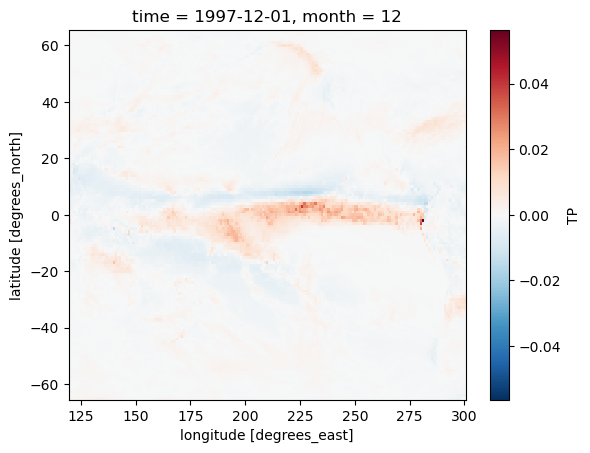

In [33]:
# Plot one month of precip anomalies
anom_precip.sel(time='1997-12-01', method='nearest').plot()

# Problem 2

### Standardize SST

In [34]:
# Calculate the standardized anomaly of SSTs for each month by subtracting the 
# mean and dividing by the standard deviation
mean_SST = ds_SST.groupby("time.month").mean("time")
std_SST = ds_SST.groupby("time.month").std("time")
standardized_SST = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    ds_SST.groupby("time.month"),
    mean_SST,
    std_SST,
)

/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slic

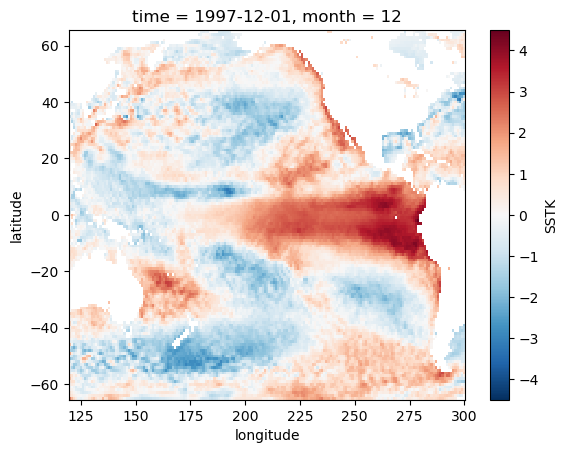

In [35]:
# Plot one month of standardized anomalies
standardized_SST['SSTK'].sel(time='1997-12-01').plot()

### Detrend SST

In [36]:
# Define function to detrend data
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

# Run the detrend function
detrend_SST = detrend_dim(standardized_SST['SSTK'],'time',1)

#### Example Plot

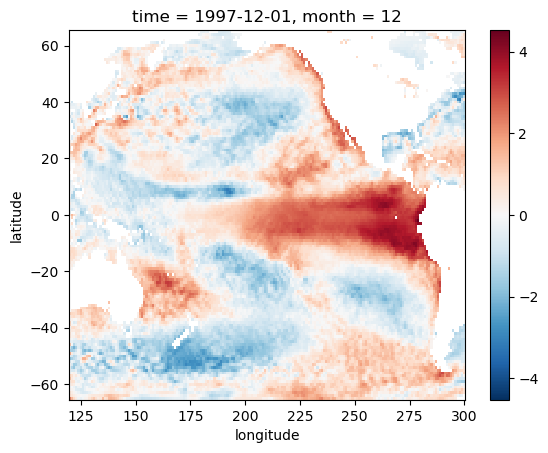

In [37]:
# Plot one month of detrended anomalies
detrend_SST.sel(time='1997-12-01', method='nearest').plot()

### Standardize Precip

In [38]:
# Calculate the standardized anomaly of precip for each month by subtracting 
# the mean and dividing by the standard deviation
mean_precip = ds_precip.groupby("time.month").mean("time")
std_precip = ds_precip.groupby("time.month").std("time")
standardized_precip = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    ds_precip.groupby("time.month"),
    mean_precip,
    std_precip,
)

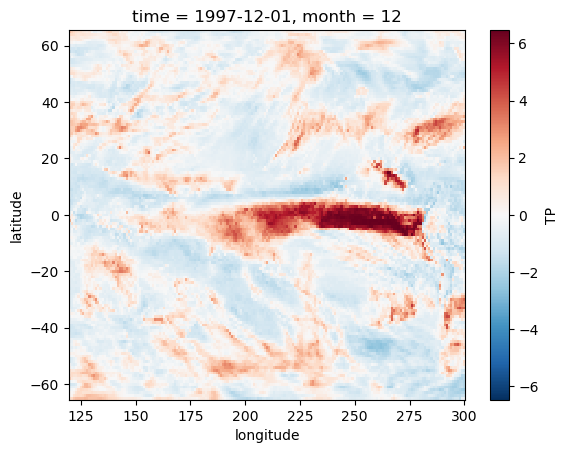

In [39]:
# Plot one month of standardized anomalies
standardized_precip['TP'].sel(time='1997-12-01').plot()

### Detrend Precip

In [44]:
# Define function to detrend data
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

# Run the detrend function
detrend_precip = detrend_dim(standardized_precip['TP'],'time',1)

#### Example Plot

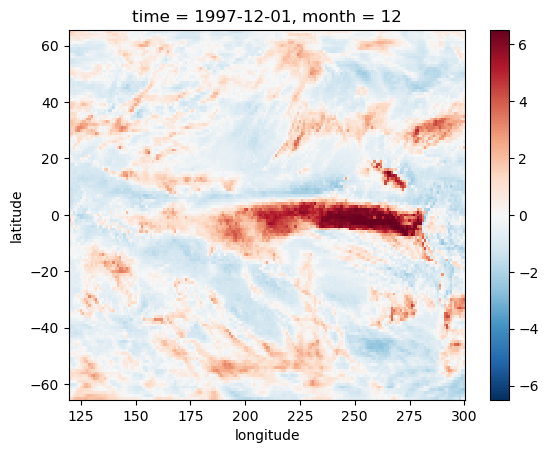

In [45]:
# Plot one month of detrended anomalies
detrend_precip.sel(time='1997-12-01', method='nearest').plot()

# Problem 3

In [46]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(detrend_SST.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(detrend_SST, weights=wgts)

In [47]:
# Save the first 5 eofs as a dataset
eofs = solver.eofs(neofs=5)

Text(0.5, 1.0, 'EOF5')

/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-p

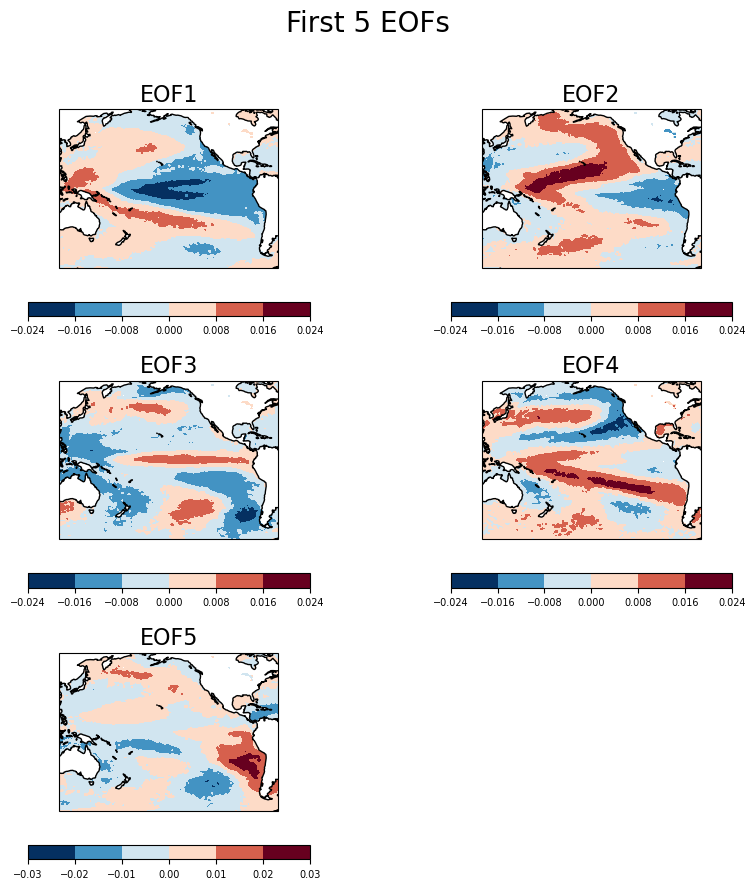

In [48]:
# Plot the first five eofs as individual maps
fig = plt.figure(figsize=(10, 10))
# Add main title
plt.suptitle('First 5 EOFs', fontsize=20)
# Plot first eof
ax1 = plt.subplot(3,2,1, projection=ccrs.PlateCarree(central_longitude=190))
fill1 = eofs[0].plot.contourf(ax=ax1, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill1, orientation='horizontal', shrink=0.8)
#cb.set_label('correlation coefficient', fontsize=12)
cb.ax.tick_params(labelsize=7)
ax1.set_title('EOF1', fontsize=16)

# Plot second eof
ax2 = plt.subplot(3,2,2, projection=ccrs.PlateCarree(central_longitude=190))
fill2 = eofs[1].plot.contourf(ax=ax2, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill2, orientation='horizontal', shrink=0.8)
#cb.set_label('correlation coefficient', fontsize=12)
cb.ax.tick_params(labelsize=7)
ax2.set_title('EOF2', fontsize=16)

# Plot third eof
ax3 = plt.subplot(3,2,3, projection=ccrs.PlateCarree(central_longitude=190))
fill3 = eofs[2].plot.contourf(ax=ax3, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill3, orientation='horizontal', shrink=0.8)
#cb.set_label('correlation coefficient', fontsize=12)
cb.ax.tick_params(labelsize=7)
ax3.set_title('EOF3', fontsize=16)

# Plot fourth eof
ax4 = plt.subplot(3,2,4, projection=ccrs.PlateCarree(central_longitude=190))
fill4 = eofs[3].plot.contourf(ax=ax4, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax4.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill4, orientation='horizontal', shrink=0.8)
#cb.set_label('correlation coefficient', fontsize=12)
cb.ax.tick_params(labelsize=7)
ax4.set_title('EOF4', fontsize=16)

# Plot fifth eof
ax5 = plt.subplot(3,2,5, projection=ccrs.PlateCarree(central_longitude=190))
fill5 = eofs[4].plot.contourf(ax=ax5, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax5.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill5, orientation='horizontal', shrink=0.8)
#cb.set_label('correlation coefficient', fontsize=12)
cb.ax.tick_params(labelsize=7)
ax5.set_title('EOF5', fontsize=16)

# Problem 4

In [49]:
# Call function to calculate fraction of variance explained by each eof
varfrac = solver.varianceFraction()

(1.8718507390282706e-31, 18.66484861395677)

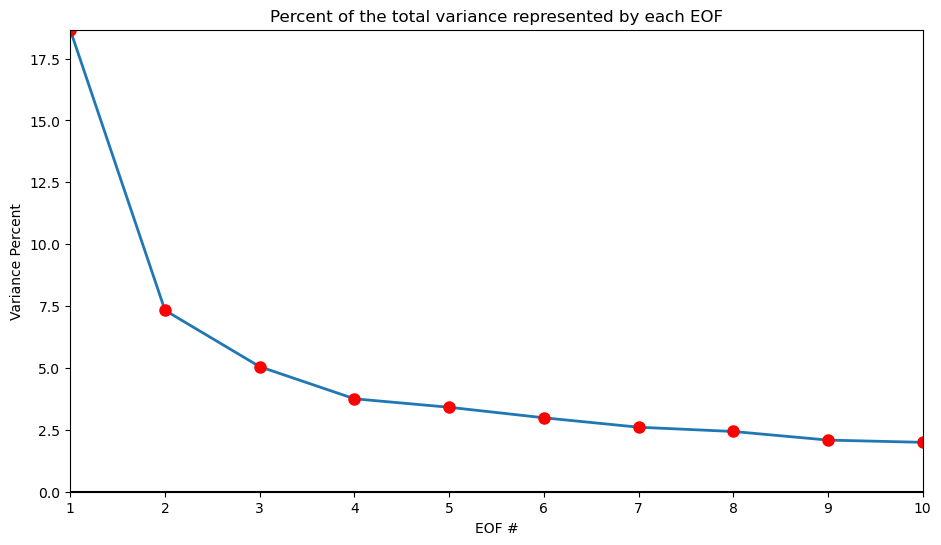

In [50]:
# Plot the percent of variance explained by each EOF
plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10]*100, linewidth=2)
plt.plot(eof_num, varfrac[0:10]*100, linestyle='None', marker="o", color='r', 
            markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 11))
plt.title('Percent of the total variance represented by each EOF')
plt.xlabel('EOF #')
plt.ylabel('Variance Percent')
plt.xlim(1, 10)
plt.ylim(np.min(varfrac)*100, (np.max(varfrac)*100)+0.01)

# Problem 5

In [51]:
# Call function to reconstruct original dataset using the first five eofs
reconstruction = solver.reconstructedField(5)
reconstruction

<xarray.DataArray (time: 516, latitude: 131, longitude: 181)>
array([[[            nan,             nan,             nan, ...,
          4.30084450e-02,  4.16952939e-04,  2.20184973e-02],
        [            nan,             nan,             nan, ...,
         -1.76885829e-02,  1.34340558e-02,  2.98029577e-02],
        [            nan,             nan,             nan, ...,
          6.57122356e-03,  8.56892320e-02,  1.65607910e-01],
        ...,
        [ 9.19623711e-02,  9.15727886e-02,  7.73805387e-02, ...,
          2.63478476e-01,  2.76018293e-01,  3.49148720e-01],
        [ 1.28318990e-01,  1.48922055e-01,  1.31455159e-01, ...,
          2.06359665e-01,  8.05677119e-03,             nan],
        [ 1.49452586e-01,  1.36690276e-01,  9.22843483e-02, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
          2.03826236e-01,  1.68029248e-01,  1.15230972e-01],
        [            nan,             nan,             nan, ...,
          6.24410471e-02,  4.98004001e-02,  7.53330036e-02],
        [            nan,             nan,             nan, ...,
          2.62301282e-02,  1.39219917e-01,  2.22419889e-01],
...
        [-5.07884210e-02,  3.97659696e-03,  3.69840263e-02, ...,
          2.10972067e-01,  2.17230168e-01,  9.31348849e-02],
        [-2.02393395e-01, -1.58521735e-01, -1.05170287e-01, ...,
         -9.90255622e-02,  3.28462988e-01,             nan],
        [-1.82150993e-01, -1.63091638e-01, -8.57343762e-02, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
          1.83434141e-01,  2.06356220e-01,  1.91492829e-01],
        [            nan,             nan,             nan, ...,
          2.47830286e-01,  2.05497540e-01,  2.11115891e-01],
        [            nan,             nan,             nan, ...,
          1.95644071e-01,  1.84551275e-01,  1.52954917e-01],
        ...,
        [-1.05224697e-01, -4.48751007e-02, -1.39090358e-02, ...,
          1.42238175e-01,  1.85566138e-01,  6.45835288e-02],
        [-1.98093912e-01, -1.72422466e-01, -1.32623341e-01, ...,
         -1.15613269e-01,  2.91373114e-01,             nan],
        [-2.07481414e-01, -1.90294457e-01, -1.20850261e-01, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
  * latitude   (latitude) float64 65.0 64.0 63.0 62.0 ... -63.0 -64.0 -65.0
  * longitude  (longitude) float64 120.0 121.0 122.0 123.0 ... 298.0 299.0 300.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  None_reconstructed_with_5_EOFs

In [52]:
# Calculate the correlation between the original data and the reconstructed 
# data
correlation = xr.corr(reconstruction, detrend_SST, dim='time')

/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


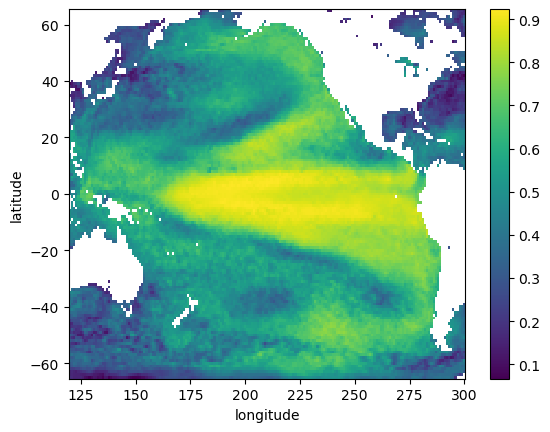

In [53]:
# Plot this correlation
correlation.plot()

# Problem 6

In [54]:
# Call function to reconstruct original dataset using the first eof only
reconstruction_1 = solver.reconstructedField(1)

In [55]:
# Calculate the correlation between the detrended and standardized precip data
# and the reconstructed SST data
precip_corr = xr.corr(reconstruction_1, detrend_precip, dim='time')

/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 1.0, 'Correlation between SST and Precipitation')

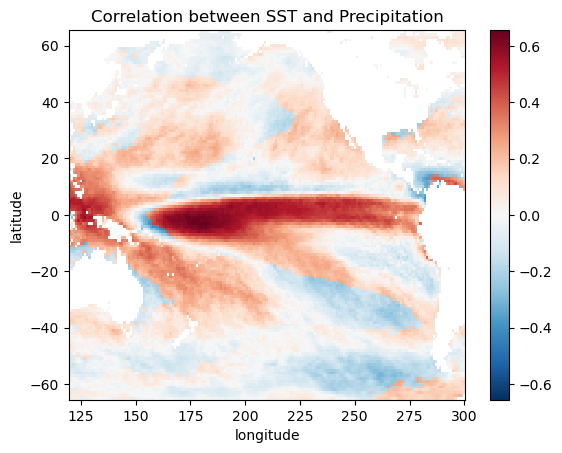

In [57]:
# Plot this correlation
precip_corr.plot()
plt.title('Correlation between SST and Precipitation')